In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
train = pd.read_csv(r'C:\Users\shara\OneDrive\Desktop\data-science\data\playground-series-s4e6\train.csv')
test = pd.read_csv(r'C:\Users\shara\OneDrive\Desktop\data-science\data\playground-series-s4e6\test.csv')
train.head()



,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [7]:
x = train.drop(["Target", "id"], axis=1)
# x['Marital status'] = x['Marital status']/x['Marital status'].max()
x["Course"] = x["Course"]/x["Course"].max()
x["Previous qualification (grade)"] = x["Previous qualification (grade)"]/x["Previous qualification (grade)"].max()
x["Unemployment rate"] = x["Unemployment rate"]/x["Unemployment rate"].max()
x["Curricular units 2nd sem (grade)"] = x["Curricular units 2nd sem (grade)"]/x["Curricular units 2nd sem (grade)"].max()
y = train["Target"]
le = LabelEncoder()
train['Target'] = le.fit_transform(train['Target'])
# xtrain, xtest, ytrain, ytest = train_test_split(train.drop(['Target'], axis=1), train['Target'], test_size=0.2)



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=500, criterion='log_loss')
# max = 0
# for i in range(200):
#     xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=i)
#     model.fit(xtrain, ytrain)
#     ypred = model.predict(xtest)
#     accuracy = accuracy_score(ytest, ypred)
#     if accuracy > max:
#         max = accuracy
#         random = i
#     print(i)
#     print("max = ",max)
# print(max, random)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)
model.fit(xtrain, ytrain)
print("score =",model.score(xtest, ytest))
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
# print("accuracy= ", accuracy)
# 0.830545391183133 49
# 0.836382645060115 7





score = 0.8348797699947726


Text(95.72222222222221, 0.5, 'Truth')

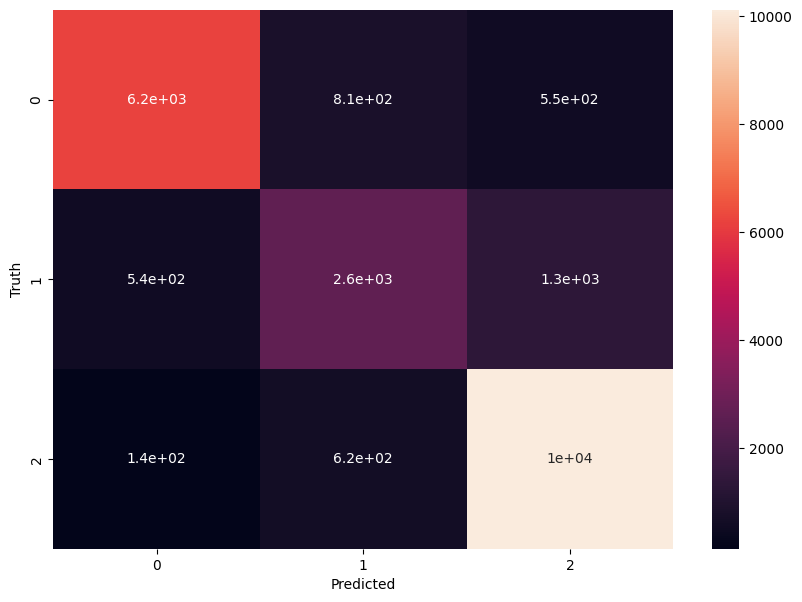

In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [124]:
# using crossval
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
print(cross_val_score(xgb, x, y))


[0.53044956 0.82514375 0.82945635 0.83036006 0.82506698]


In [145]:
model = RandomForestClassifier(n_estimators=150, criterion='log_loss')

In [146]:
model.fit(xtrain, ytrain)

RandomForestClassifier(criterion='log_loss', n_estimators=150)

In [147]:
from sklearn.model_selection import cross_val_score
model.score(xtest, ytest)
# print(cross_val_score(model, x, y))

0.8269733403031887

In [148]:
from sklearn.metrics import accuracy_score
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
accuracy

0.8269733403031887

In [14]:
print(y)

0        2
1        0
2        0
3        1
4        2
        ..
76513    2
76514    2
76515    1
76516    0
76517    2
Name: Target, Length: 76518, dtype: int32


In [34]:
import numpy as np
# graduate = 2
# dropout = 0
# enrolled = 1
x = test.drop("id", axis = 1)
# x['Marital status'] = x['Marital status']/x['Marital status'].max()
x["Course"] = x["Course"]/x["Course"].max()
x["Previous qualification (grade)"] = x["Previous qualification (grade)"]/x["Previous qualification (grade)"].max()
x["Unemployment rate"] = x["Unemployment rate"]/x["Unemployment rate"].max()
x["Curricular units 2nd sem (grade)"] = x["Curricular units 2nd sem (grade)"]/x["Curricular units 2nd sem (grade)"].max()

output = model.predict(x)
mapping = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
output = np.vectorize(mapping.get)(output)
print(output)


['Dropout' 'Graduate' 'Graduate' ... 'Dropout' 'Dropout' 'Dropout']


In [35]:
ids = test['id']
ids

    

0         76518
1         76519
2         76520
3         76521
4         76522
          ...  
51007    127525
51008    127526
51009    127527
51010    127528
51011    127529
Name: id, Length: 51012, dtype: int64

In [36]:
df = pd.DataFrame({
    'id': ids,
    'Target': output
})

df

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [37]:
df.to_csv('output.csv', index=False)
